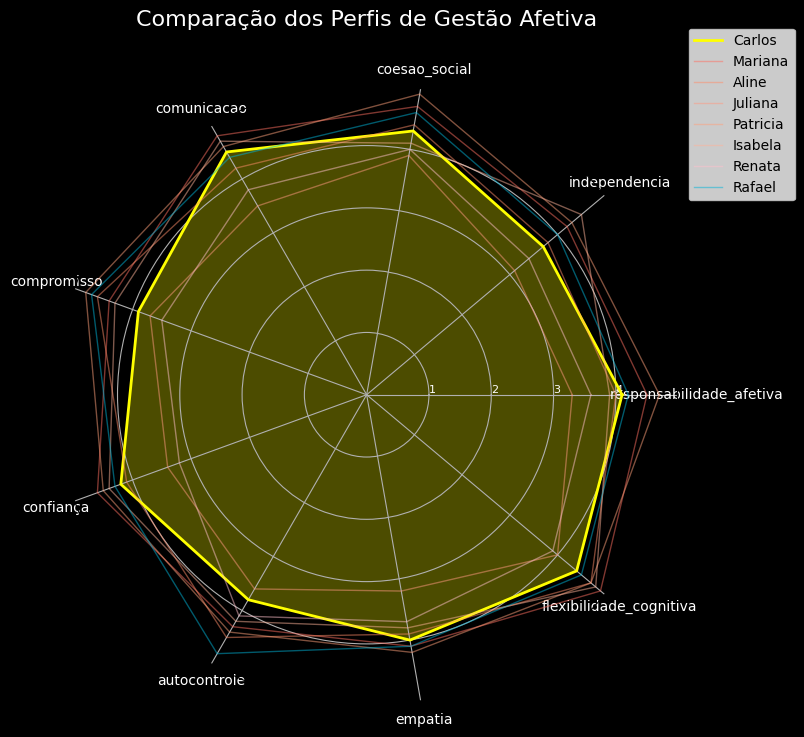

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import io

def grafico_teia(df, participante_destaque):
    variaveis = ['responsabilidade_afetiva', 'independencia', 'coesao_social', 'comunicacao', 'compromisso', 'confiança', 'autocontrole', 'empatia', 'flexibilidade_cognitiva']
    num_variaveis = len(variaveis)
    valores = df[variaveis].values.tolist()
    angulos = [n / float(num_variaveis) * 2 * pi for n in range(num_variaveis)]
    angulos += angulos[:1]

    plt.figure(figsize=(8, 8), facecolor='black')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('black')

    cores_azul_verde = ['#0077B6', '#009688', '#00B4D8', '#48CAE4', '#90E0EF']
    cores_vermelho = ['#FF4C4C', '#FF6F61', '#FF8C69', '#FF9980', '#FFA07A', '#FFB399', '#FFC0CB'] # Mais tons de vermelho


    for i, participante in enumerate(df['participante']):
        valores_participante = valores[i]
        valores_participante += valores_participante[:1]

        if participante == participante_destaque:
            ax.plot(angulos, valores_participante, linewidth=2, linestyle='solid', label=participante, color='yellow')
            ax.fill(angulos, valores_participante, color='yellow', alpha=0.3)
        elif participante in df['participante'][1:-1].tolist(): # Mulheres no meio
            cor_vermelho = cores_vermelho[i % len(cores_vermelho)]
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_vermelho, alpha=0.5)
        else: # Homens no final
            cor_homem = cores_azul_verde[i % len(cores_azul_verde)]
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_homem, alpha=0.5)


    plt.xticks(angulos[:-1], variaveis, color='white', size=10)
    ax.tick_params(colors='white')
    ax.yaxis.set_tick_params(labelsize=8)
    ax.set_rlabel_position(0)

    plt.title('Comparação dos Perfis de Gestão Afetiva', size=16, color='white', y=1.08)
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()



# Dataset
data_csv_3 = """participante,tipo_relacionamento,responsabilidade_afetiva,independencia,coesao_social,comunicacao,compromisso,confiança,autocontrole,empatia,flexibilidade_cognitiva
Carlos,Relação Aberta com Foco no Casual,4.1,3.7,4.3,4.5,3.9,4.2,3.8,4,4.4
Mariana,Relação Fechada com Alta Cumplicidade,4.5,4.2,4.7,4.8,4.4,4.6,4.3,4.1,4.9
Aline,Poliamor com Alta Interdependência,4,3.8,4.4,4.2,4.6,4.1,4.5,3.9,4.7
Juliana,Swing com Trocas Sexuais,3.3,3.1,3.9,3.5,3.7,3.4,3.6,3.2,4
Patricia,Relação Fechada com Alta Conexão Social,4.7,4.3,4.9,4.6,4.8,4.5,4.4,4.2,4.7
Isabela,Poliamor Não-Hierárquico com Alta Cumplicidade,3.9,4.5,4.1,4.7,4.3,4.4,4.2,3.8,4.8
Renata,Relação Aberta com Envolvimento Emocional Limitado,3.6,3.4,4,3.8,3.5,3.2,4.1,3.7,3.9
Rafael,Poliamor Não-Hierárquico com Conexões Emocionais,4.2,4,4.6,4.4,4.7,4.3,4.8,4.1,4.5
"""

df_3 = pd.read_csv(io.StringIO(data_csv_3))
grafico_teia(df_3, 'Carlos')